<a href="https://colab.research.google.com/github/MaxZx3000/Forest-Fire/blob/main/Final_Project_Forest_Fire_Classifier_(Anthony_Kevin_Oktavius).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Forest Fire Classifier

Dibuat oleh: Anthony Kevin Oktavius

Library Import

In [ ]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import smogn
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from keras import backend as K

from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTENC

## Data Loading

Mengunduh dataset forestfire.csv dari UCI Machine Learning Repository

In [15]:
dataset_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

forest_fire_df = pd.read_csv(dataset_url)
forest_fire_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Melihat info singkat pada dataset.

In [16]:
forest_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Melihat nilai statistika pada dataset forest fire.

In [17]:
forest_fire_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Melakukan listing field-field pada dataset forest fire.


In [18]:
x_field = "X"
y_field = "Y"
month_field = "month"
day_field = "day"
ffmc_field = "FFMC"
dmc_field = "DMC"
dc_field = "DC"
isi_field = "ISI"
temp_field = "temp"
rh_field = "RH"
wind_field = "wind"
rain_field = "rain"
area_field = "area"

Mendefinisikan field numerikal dan kategorikal pada dataset forest fire.

In [19]:
categorical_variables = [x_field, y_field, month_field, day_field]
numerical_variables = [ffmc_field, dmc_field, dc_field, isi_field,
                       temp_field, rh_field, wind_field, rain_field, area_field]

Mendefinisikan field-field target dan features.

In [20]:
features = list(forest_fire_df.columns)
features.remove(area_field)
# features.remove(month_field)
# features.remove(day_field)
# features.remove(rain_field)
# features.remove(x_field)
# features.remove(y_field)

target = area_field

## Data Visualization

### Single Variable

Bar Plot - Comparison

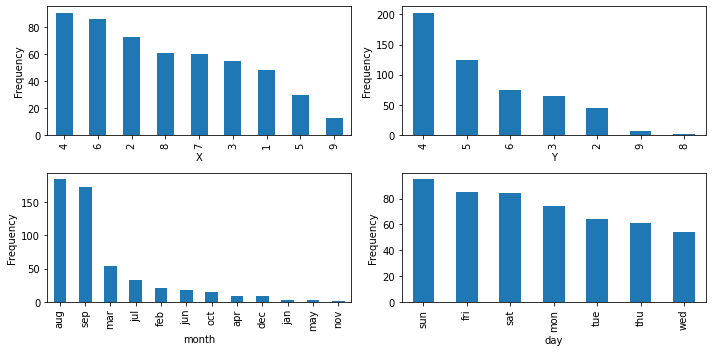

In [ ]:
bar_plot_fields = categorical_variables.copy()

figure, axes = plt.subplots(2, 2, figsize = (10, 5))
axes = axes.flatten()


for index, field in enumerate(bar_plot_fields):
  forest_fire_df[field].value_counts().plot(kind = 'bar', 
                                            ax = axes[index],
                                            xlabel = field,
                                            ylabel = "Frequency")

plt.tight_layout()
plt.show()

Dist plot - Distribution

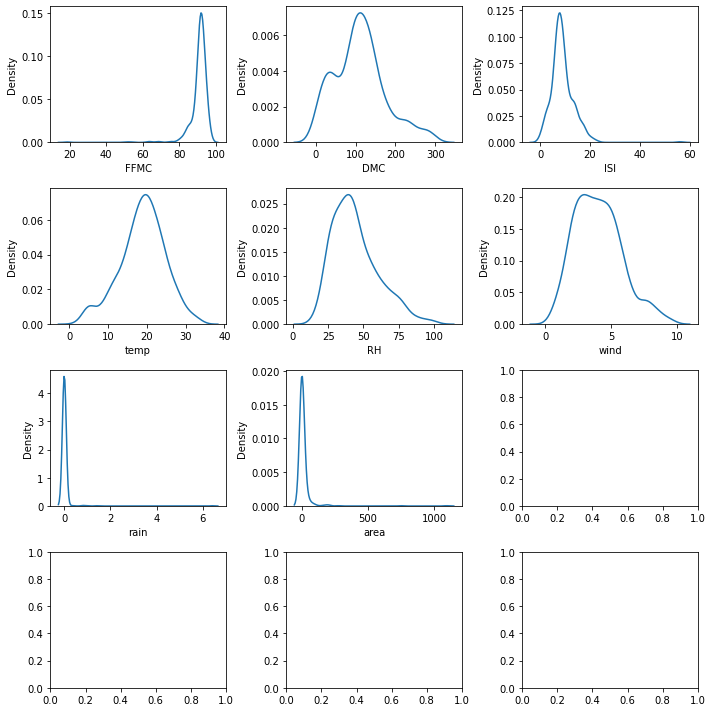

In [ ]:
dist_plot_fields = numerical_variables.copy()

figure, axes = plt.subplots(4, 3, figsize = (10, 10))
axes = axes.flatten()

for index, field in enumerate(dist_plot_fields):
  sns.kdeplot(forest_fire_df[field], ax = axes[index])

plt.tight_layout()
plt.show()

Box Plot - Distribution & Comparison & Outlier Detection

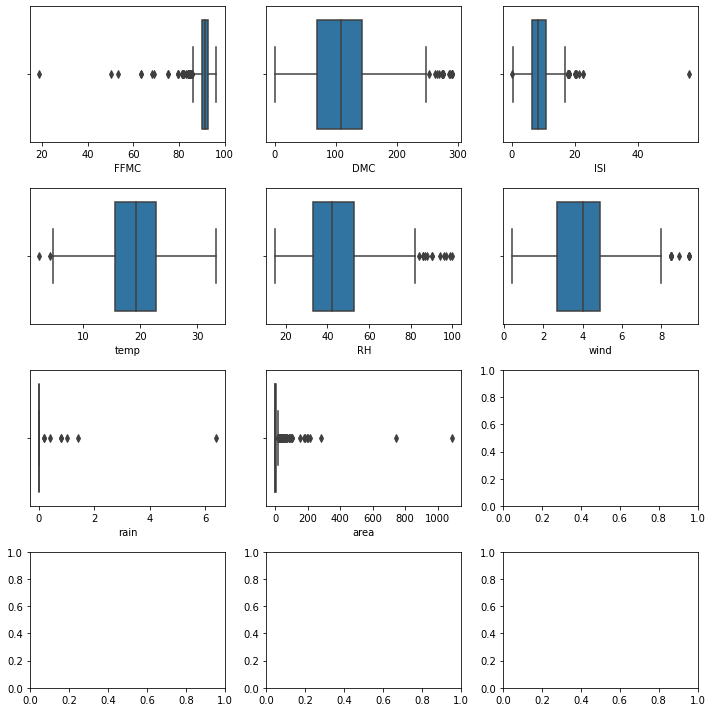

In [ ]:
box_plot_fields = numerical_variables.copy()

figure, axes = plt.subplots(4, 3, figsize = (10, 10))
axes = axes.flatten()

for index, field in enumerate(box_plot_fields):
  sns.boxplot(data = forest_fire_df, x = field, ax = axes[index])

plt.tight_layout()
plt.show()

### Two Variables

Mean Bar Plot - Comparison

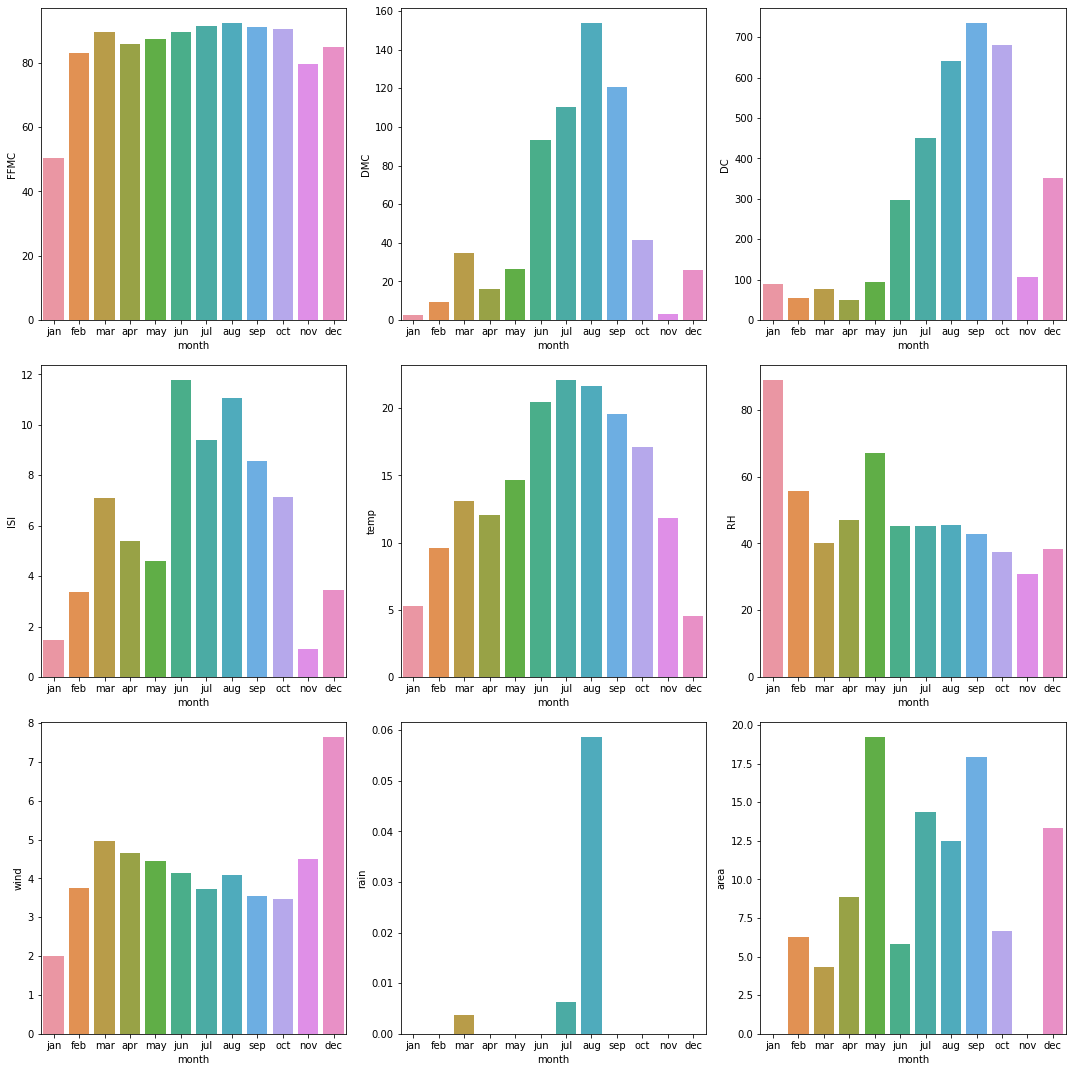

In [ ]:
figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
axes = axes.flatten()

mean_bar_plot_fields = numerical_variables.copy()

for index, field in enumerate(mean_bar_plot_fields):
  sns.barplot(data = forest_fire_df, 
              x = month_field, 
              y = field,
              ax = axes[index],
              ci = None,
              order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep",
                      "oct", "nov", "dec"])
  
plt.tight_layout()

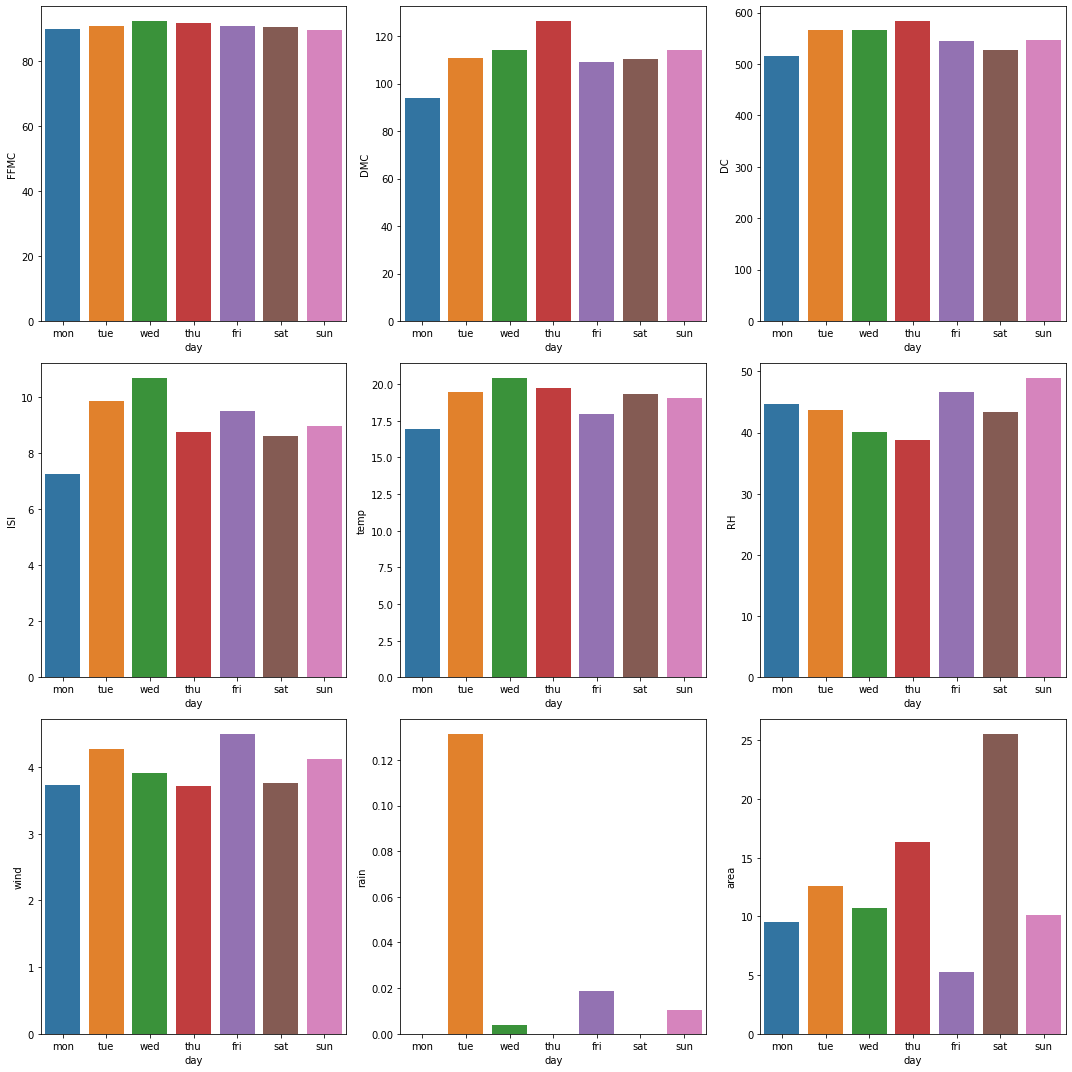

In [ ]:
figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
axes = axes.flatten()

mean_bar_plot_fields = numerical_variables.copy()

for index, field in enumerate(mean_bar_plot_fields):
  sns.barplot(data = forest_fire_df, 
              x = day_field, 
              y = field,
              ax = axes[index],
              ci = None,
              order = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])
  
plt.tight_layout()

Multiple Bar Chart - Composition & Comparison

In [ ]:
def make_multiple_bar_plot(df, x1, x2, y, cmap, ax, statistic, order):
  target_field_two_categorical_df = df.groupby([x1, x2]).mean()[y]

  mean_target_field_two_categorical_df = target_field_two_categorical_df.unstack(
      level = 1
  )

  mean_target_field_two_categorical_df = mean_target_field_two_categorical_df.reset_index()

  mean_target_field_two_categorical_df = pd.melt(
      mean_target_field_two_categorical_df,
      id_vars = x1,
      var_name = x2,
      value_name = y
  )
  
  sns.barplot(x = x1,
              y = y,
              hue = x2,
              data = forest_fire_df,
              ax = ax,
              ci = None,
              order = order)

day month        fri        mon        sat        sun        thu        tue  \
0     apr   0.000000   3.350000   0.000000  20.376667   7.770000        NaN   
1     aug   5.600476   1.187333  14.054138   9.866500  32.198846   6.228571   
2     dec   9.270000  15.095000        NaN   8.980000   5.380000  24.770000   
3     feb   5.772000   3.320000   1.710000  17.802500   0.000000   3.765000   
4     jan        NaN        NaN   0.000000   0.000000        NaN        NaN   
5     jul  13.220000  70.040000   1.267500   3.446000   1.503333  16.733333   
6     jun   0.396667   1.820000  35.160000   0.225000   6.635000        NaN   
7     mar   0.985455   8.495000   8.065000   3.932857   1.750000   0.000000   
8     may  38.480000        NaN   0.000000        NaN        NaN        NaN   
9     nov        NaN        NaN        NaN        NaN        NaN   0.000000   
10    oct   0.000000  15.410000   8.076667   0.000000        NaN   0.000000   
11    sep   5.298158   5.922500  61.804400  14.01074

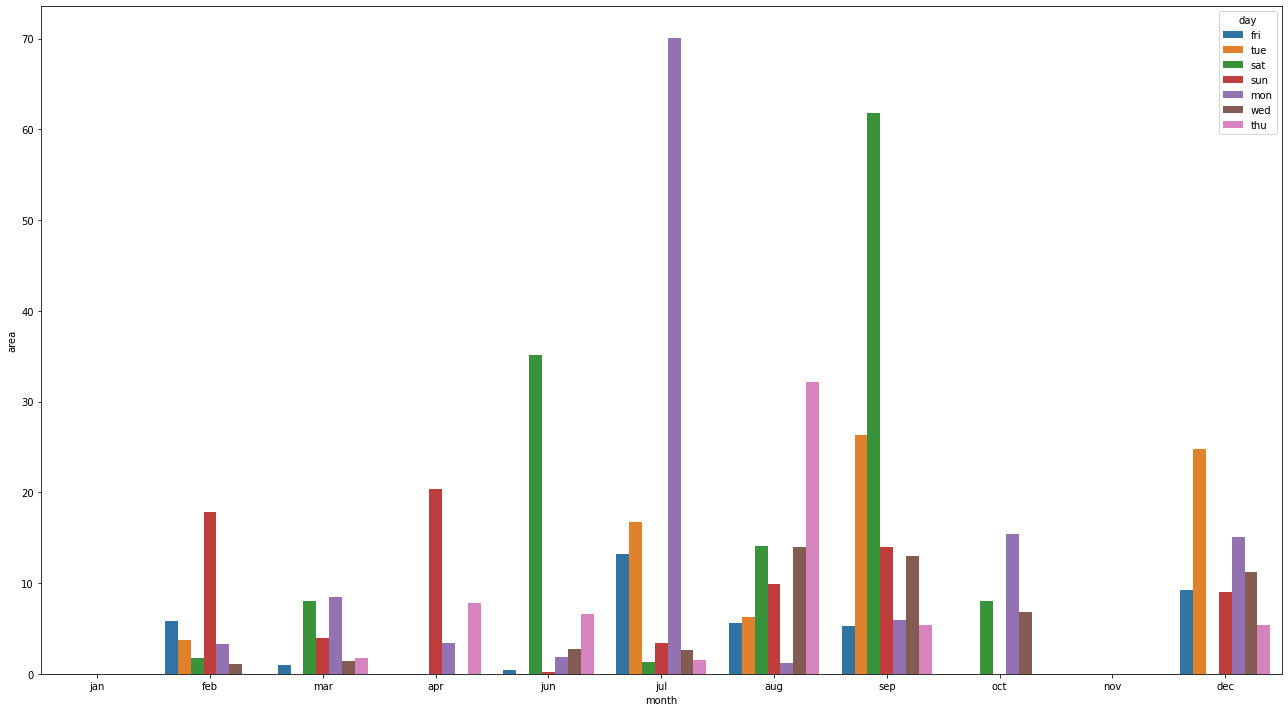

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

fig.set_figwidth(18)
fig.set_figheight(10)

multiple_bar_fields = categorical_variables.copy()
multiple_bar_fields.append(area_field)
    
make_multiple_bar_plot(forest_fire_df, 
                        x1 = month_field, 
                        x2 = day_field,
                        y = area_field, 
                        cmap = 'inferno',
                        ax = ax,
                        statistic = 'mean',
                        order =  ["jan", "feb", "mar", "apr", "jun", "jul", "aug", "sep",
                       "oct", "nov", "dec"])
  
plt.tight_layout()
plt.show()

### Multiple Variables

Correlation Plot - Correlation

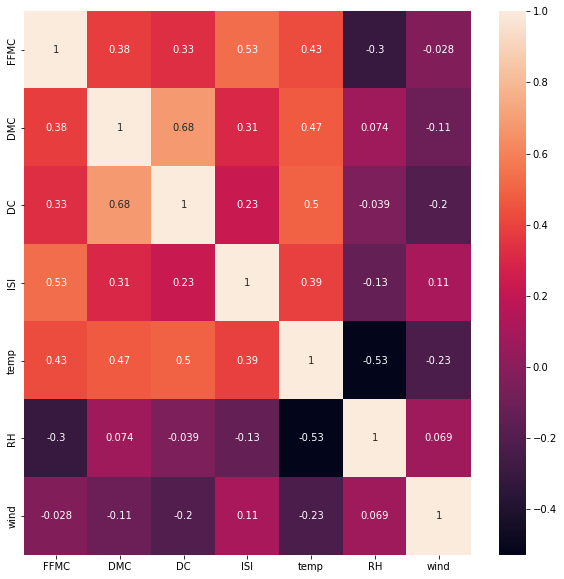

In [ ]:
corr_plot_fields = features.copy()

plt.figure(figsize = (10, 10))
sns.heatmap(
    forest_fire_df[corr_plot_fields].corr(),
    annot = True,
)
plt.show()

Pairplot - Distribution & Comparison & Correlation

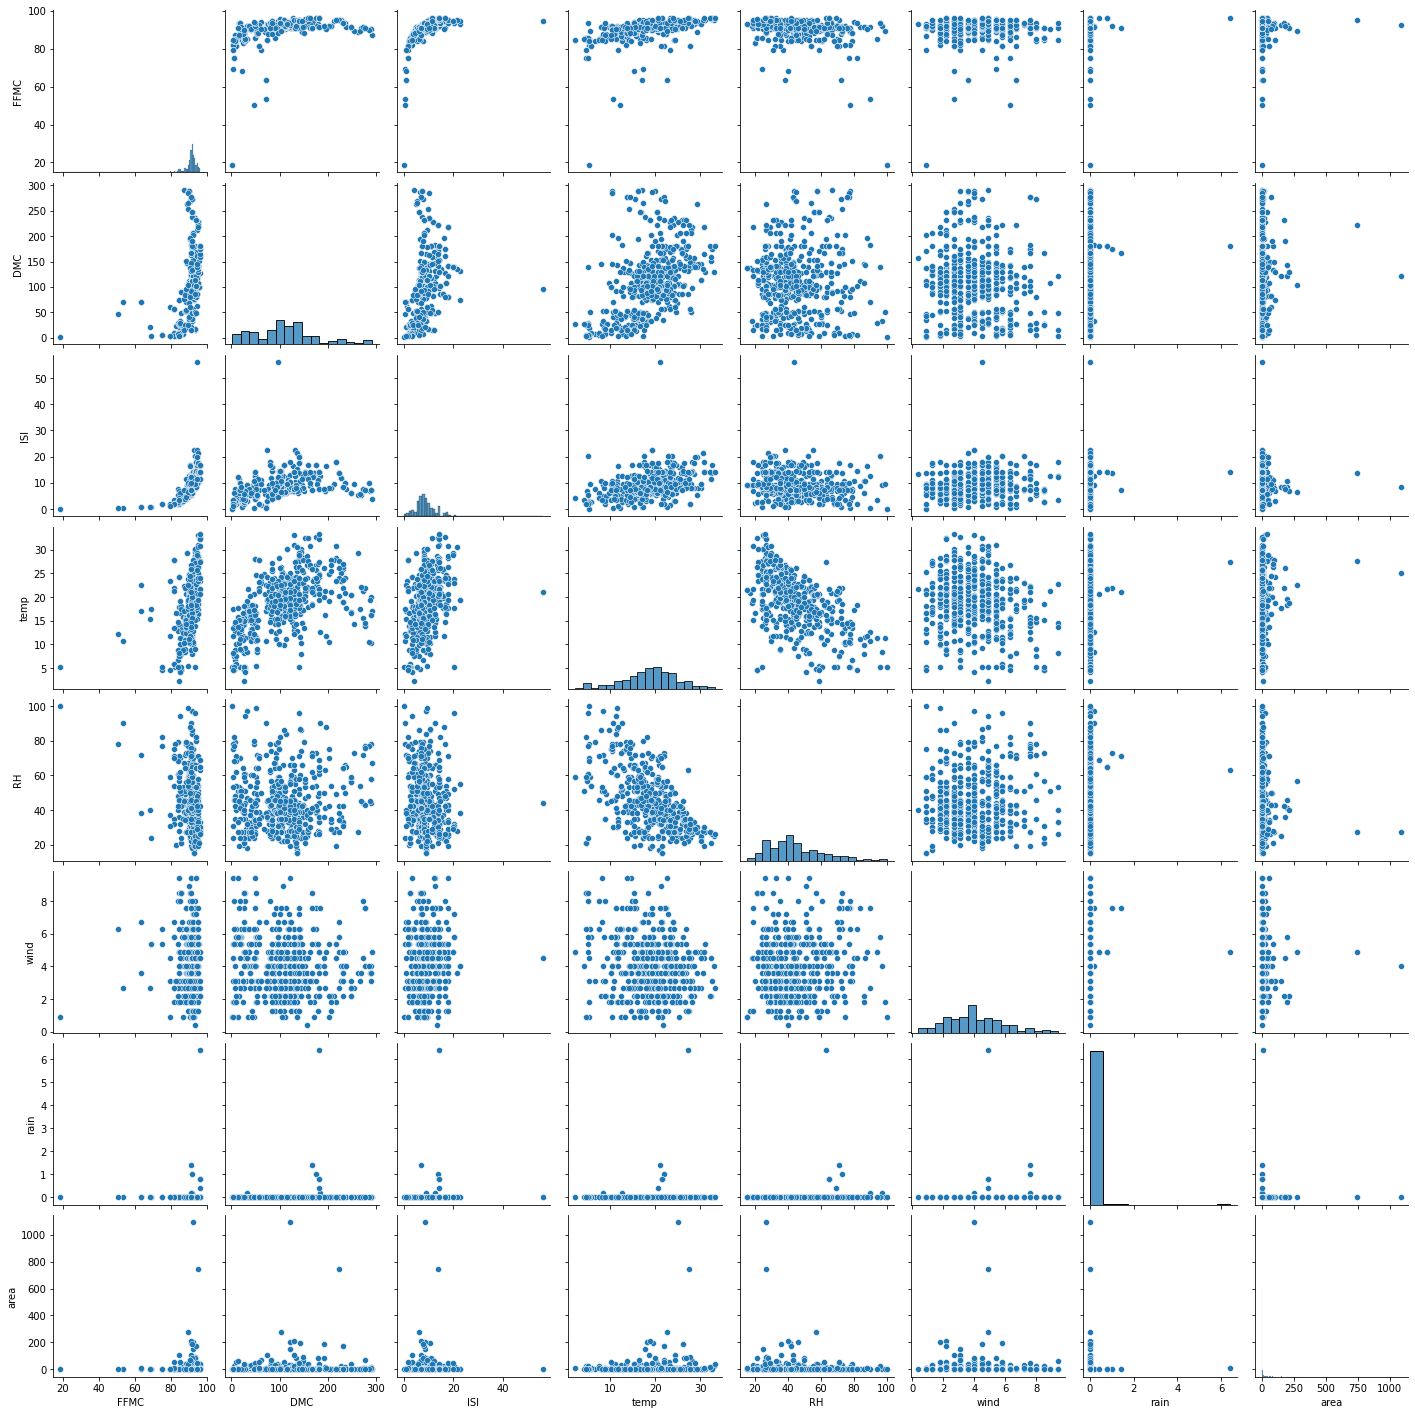

In [ ]:
pairplot_fields = numerical_variables.copy()

sns.pairplot(
    data = forest_fire_df[pairplot_fields],
)

## Data Preprocessing

### Hapus field yang tidak diperlukan

In [ ]:
# uneccessary_fields = [x_field, y_field]
# neccesary_forest_fire_df = forest_fire_df.drop(
#     uneccessary_fields, 
#     axis = 1
# ).copy()
# neccesary_forest_fire_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Konversi Bulan dan Hari menjadi Angka

In [21]:
months = {
    'jan': 1, 
    'nov': 2,
    'mar': 3,
    'jun': 4,
    'oct': 5,
    'feb': 6,
    'apr': 7,
    'aug': 8,
    'dec': 9,
    'jul': 10,
    'sep': 11,
    'may': 12,
}

days = {
    'fri': 1,
    'mon': 2,
    'sun': 3,
    'wed': 4,
    'tue': 5,
    'thu': 6,
    'sat': 7,
}

In [22]:
month_day_converted_forest_fire_df = forest_fire_df.copy()
month_day_converted_forest_fire_df[month_field] = month_day_converted_forest_fire_df[month_field].replace(months)
month_day_converted_forest_fire_df[day_field] = month_day_converted_forest_fire_df[day_field].replace(days)

In [23]:
month_day_converted_forest_fire_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,5,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,5,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,1,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Area Feature Transformation dengan logarithm transformation.



In [ ]:
# log_transform_forest_fire_df = month_day_converted_forest_fire_df.copy()
# log_transform_forest_fire_df[area_field] = np.log1p(log_transform_forest_fire_df[area_field])
# log_transform_forest_fire_df[rain_field] = np.log1p(log_transform_forest_fire_df[rain_field])
# log_transform_forest_fire_df[isi_field] = np.log1p(log_transform_forest_fire_df[isi_field])

### Train Test Split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    month_day_converted_forest_fire_df[features],
    month_day_converted_forest_fire_df[target],
    test_size = 0.13
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(449, 12)
(68, 12)
(449,)
(68,)


### Teknik Oversampling dengan SMOGN

In [34]:
train_oversampled_df = month_day_converted_forest_fire_df.copy()

train_oversampled_df = smogn.smoter(
    data = train_oversampled_df,
    samp_method = 'extreme',
    y = area_field
)
train_oversampled_df

r_index: 100%|##########| 85/85 [00:00<00:00, 420.47it/s]


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,4,5,8,5,95.970057,162.203403,640.185331,13.191531,29.811872,29,4.780227,0.0,33.986515
1,5,5,8,6,95.449369,166.164982,639.245695,13.199082,29.561079,32,4.562113,0.0,8.931402
2,2,5,8,5,95.180907,131.610899,579.328239,10.635480,24.766425,27,2.782736,0.0,18.633316
3,2,5,8,2,94.317706,134.414752,584.161636,13.589834,23.724918,33,4.532458,0.0,9.482738
4,3,2,8,5,93.554688,119.896972,637.215333,12.835987,22.381787,29,3.955176,0.0,9.365169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1,2,8,1,91.000000,166.900000,752.600000,7.100000,18.500000,73,8.500000,0.0,0.000000
508,1,2,8,1,91.000000,166.900000,752.600000,7.100000,25.900000,41,3.600000,0.0,0.000000
509,5,4,8,1,91.000000,166.900000,752.600000,7.100000,21.100000,71,7.600000,1.4,2.170000
513,2,4,8,3,81.600000,56.700000,665.600000,1.900000,21.900000,71,5.800000,0.0,54.290000


### MinMaxScaler

In [ ]:
# min_max_fields = features.copy()

# x_train_scaled = x_train.copy()
# x_test_scaled = x_test.copy()

# y_train_scaled = pd.DataFrame(y_train.copy(), columns = [area_field])
# y_test_scaled = pd.DataFrame(y_test.copy(), columns = [area_field])

# min_max_scaler = MinMaxScaler()
# x_train_scaled[min_max_fields] = min_max_scaler.fit_transform(x_train[min_max_fields])
# x_test_scaled[min_max_fields] = min_max_scaler.transform(x_test[min_max_fields])

# min_max_scaler = MinMaxScaler()
# y_train_scaled[area_field] = min_max_scaler.fit_transform(y_train_scaled[[area_field]])
# y_test_scaled[area_field] = min_max_scaler.transform(y_test_scaled[[area_field]])

### Feature Selection dengan Random Forest

In [35]:
random_forest = RandomForestRegressor(random_state = 100)
random_forest = random_forest.fit(
    train_oversampled_df[features],
    train_oversampled_df[target],
)

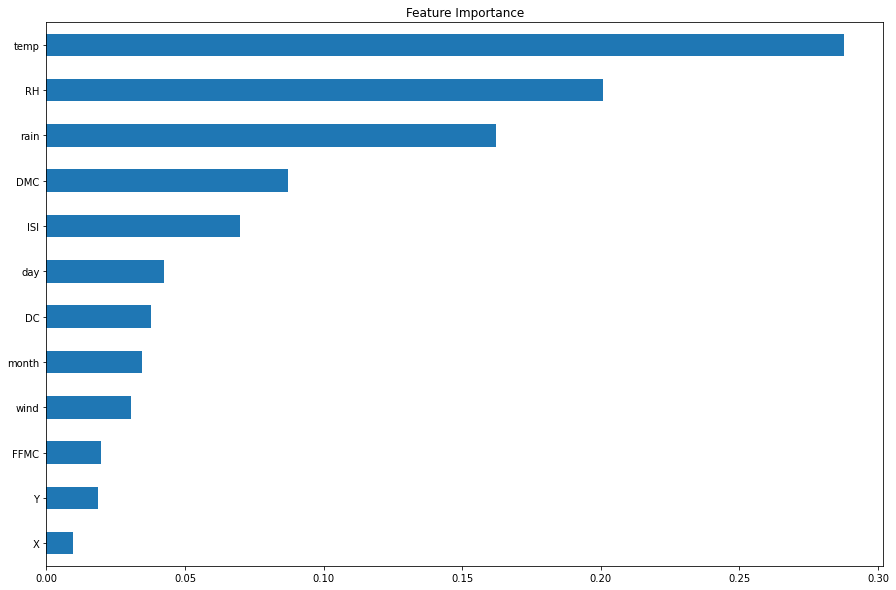

In [36]:
X_ = np.array(features)
importance_scores = random_forest.feature_importances_

plt.figure(figsize=(15, 10))
plt.title('Feature Importance')

feature_importances = pd.Series(random_forest.feature_importances_, index = X_)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')

plt.show()

### Post Data Visualization

#### Single Variable

In [37]:
def single_plot_template(df, fields, plot_type, title, nrows, ncols, figsize = (15, 15)):
  figure, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
  figure.suptitle(title)
  figure.subplots_adjust(top=0.96)

  axes = axes.flatten()
  for index, field in enumerate(fields):
    single_plot_function = eval(plot_type)
    single_plot_function(data = df, x = field, ax = axes[index])

  plt.tight_layout()
  plt.show()

In [38]:
post_data_kde_fields = features.copy()

single_plot_template(df = x_train_scaled, 
                     fields = post_data_kde_fields, 
                     plot_type = "sns.kdeplot",
                     title = "Train",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = x_test_scaled, 
                     fields = post_data_kde_fields, 
                     plot_type = "sns.kdeplot",
                     title = "Test",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = y_train_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.kdeplot",
                     title = "Train",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

single_plot_template(df = y_test_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.kdeplot",
                     title = "Test",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

NameError: ignored

In [ ]:
post_data_box_fields = features.copy()

single_plot_template(df = x_train_scaled, 
                     fields = post_data_box_fields, 
                     plot_type = "sns.boxplot",
                     title = "Train",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = x_test_scaled, 
                     fields = post_data_box_fields, 
                     plot_type = "sns.boxplot",
                     title = "Test",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = y_train_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.boxplot",
                     title = "Train",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

single_plot_template(df = y_test_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.boxplot",
                     title = "Test",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

#### Mutliple Variables

In [ ]:
def multiple_fields_plot_template(df, suptitle, plot_type):

  plot_function = eval(plot_type)
  try:
    plot_function(data = df, annot = True)
  except:
    plot_function(data = df)
    
  plt.suptitle(suptitle)
  plt.show()
  plt.tight_layout()

In [ ]:
forest_fire_multiple_plots_df_train = pd.concat([x_train_scaled, y_train_scaled], axis = 1)
forest_fire_multiple_plots_df_test = pd.concat([x_test_scaled, y_test_scaled], axis = 1)

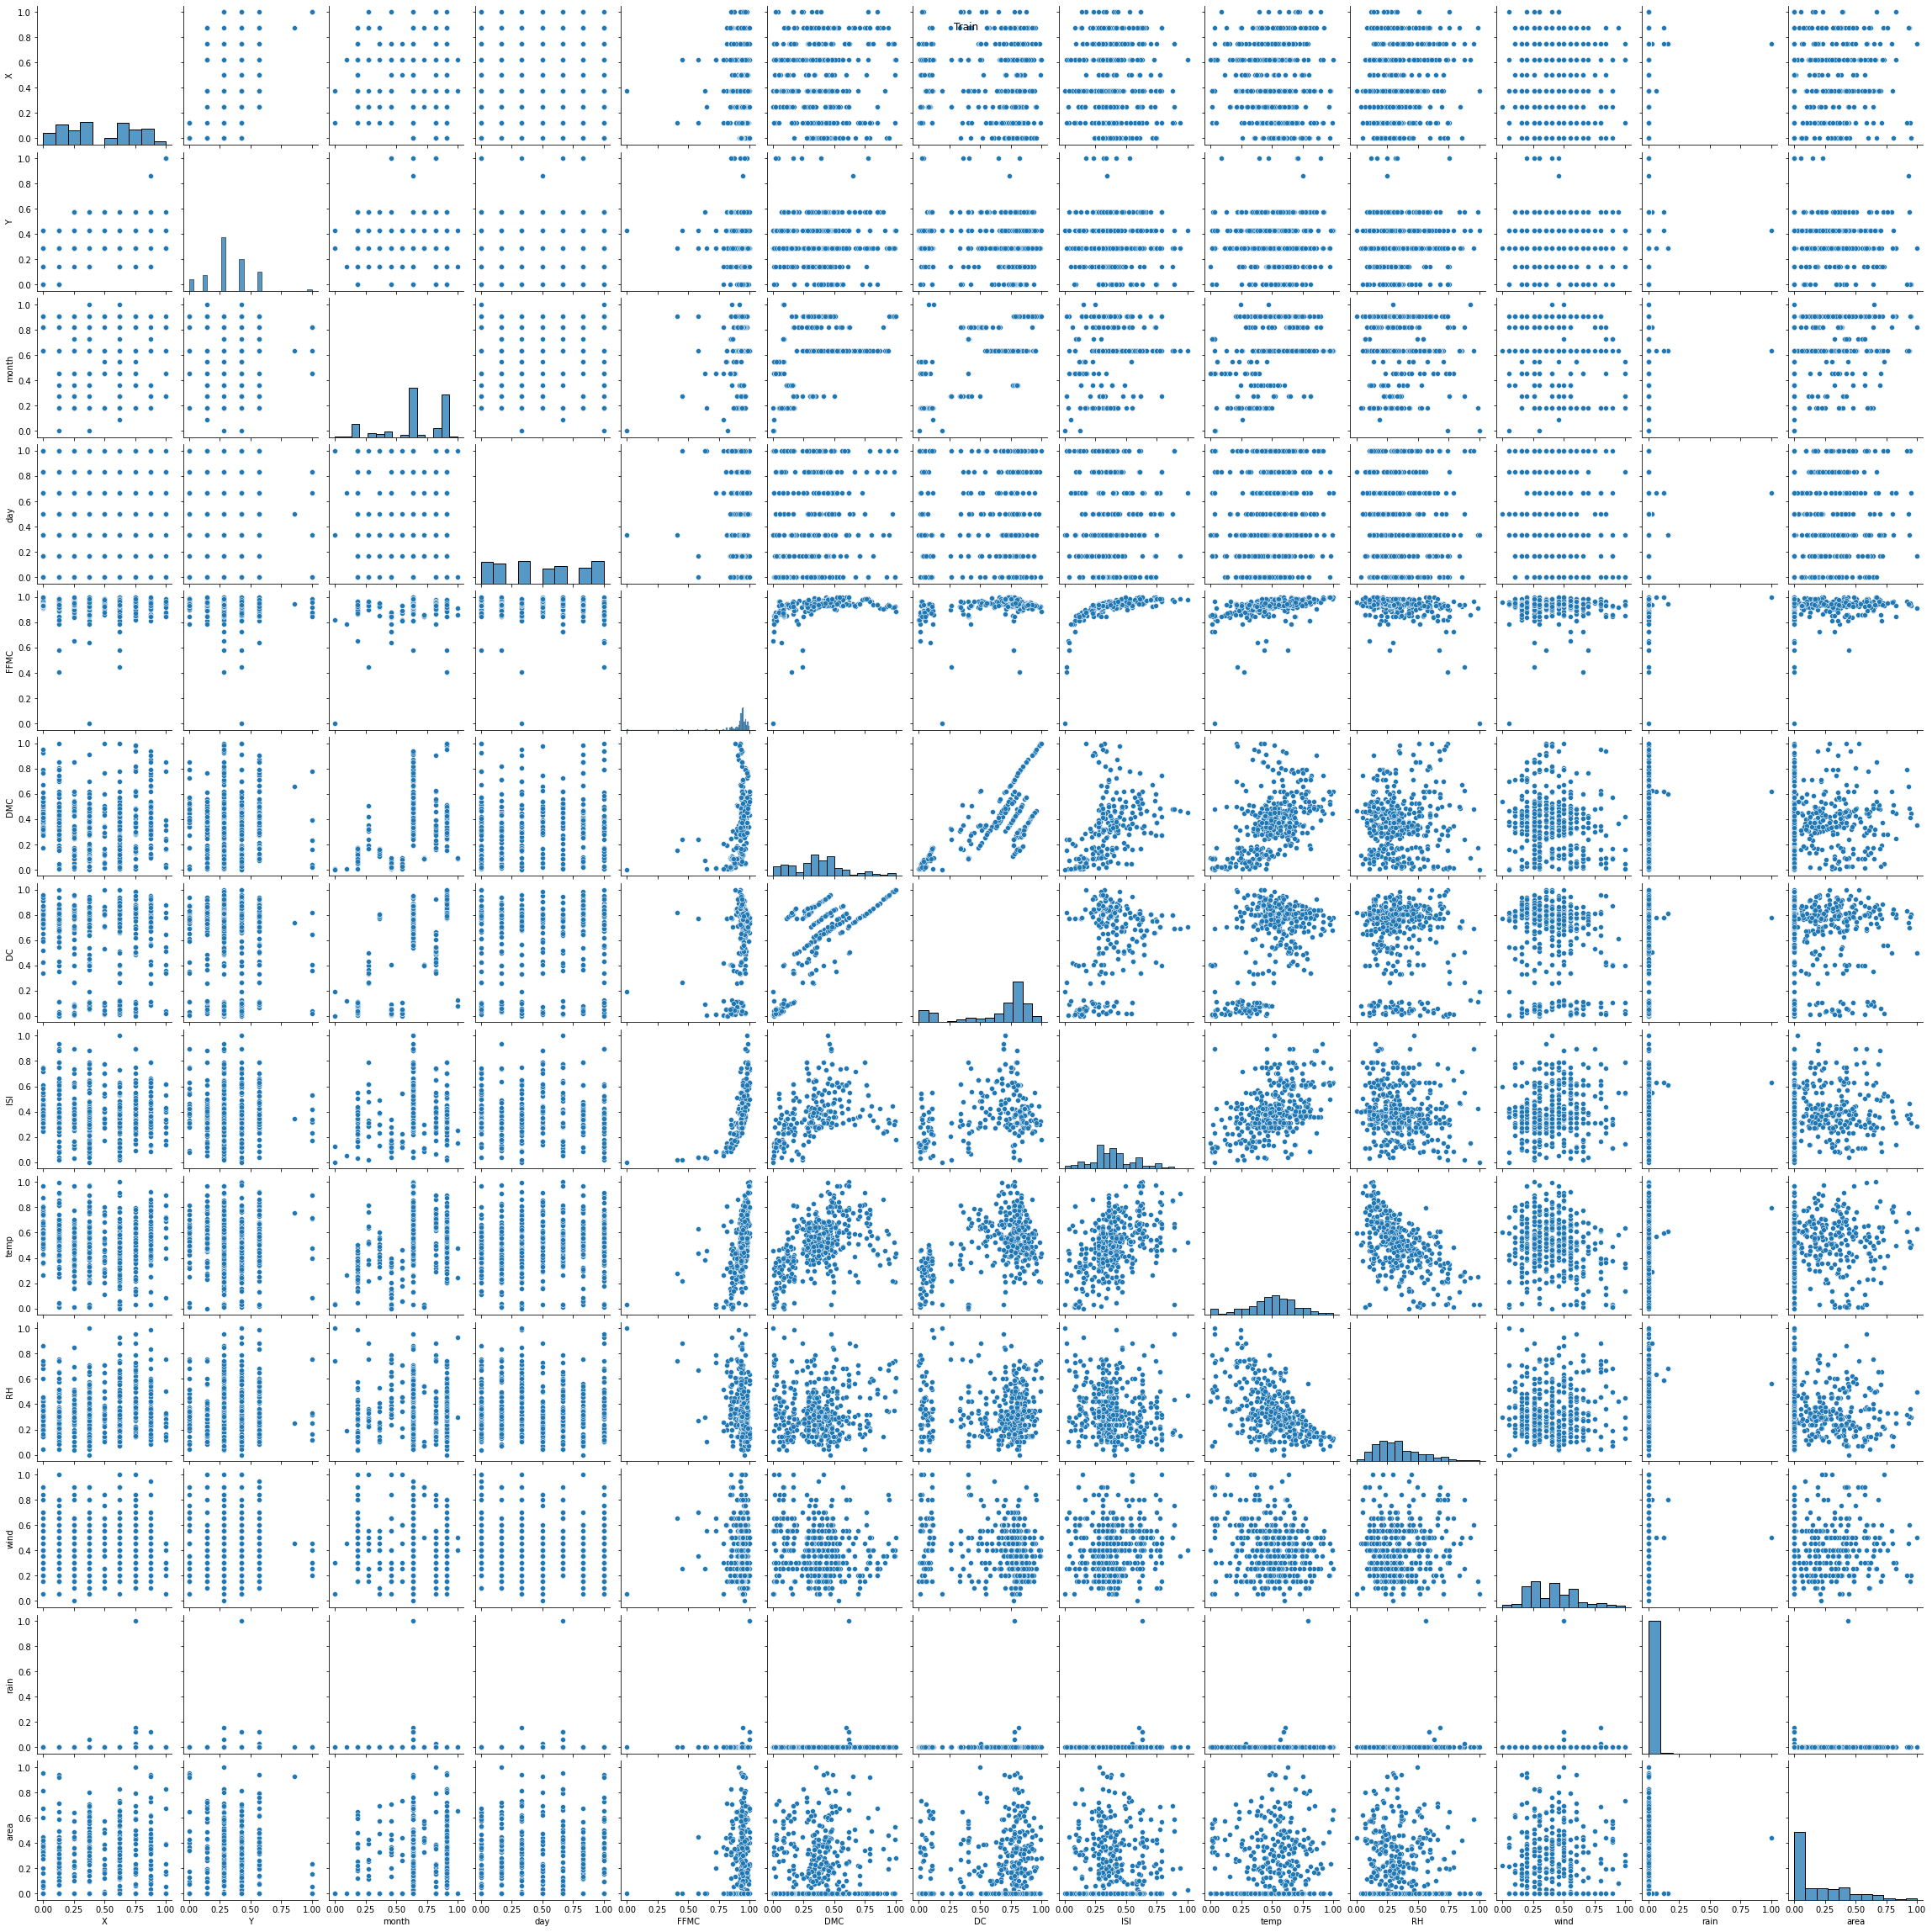

<Figure size 432x288 with 0 Axes>

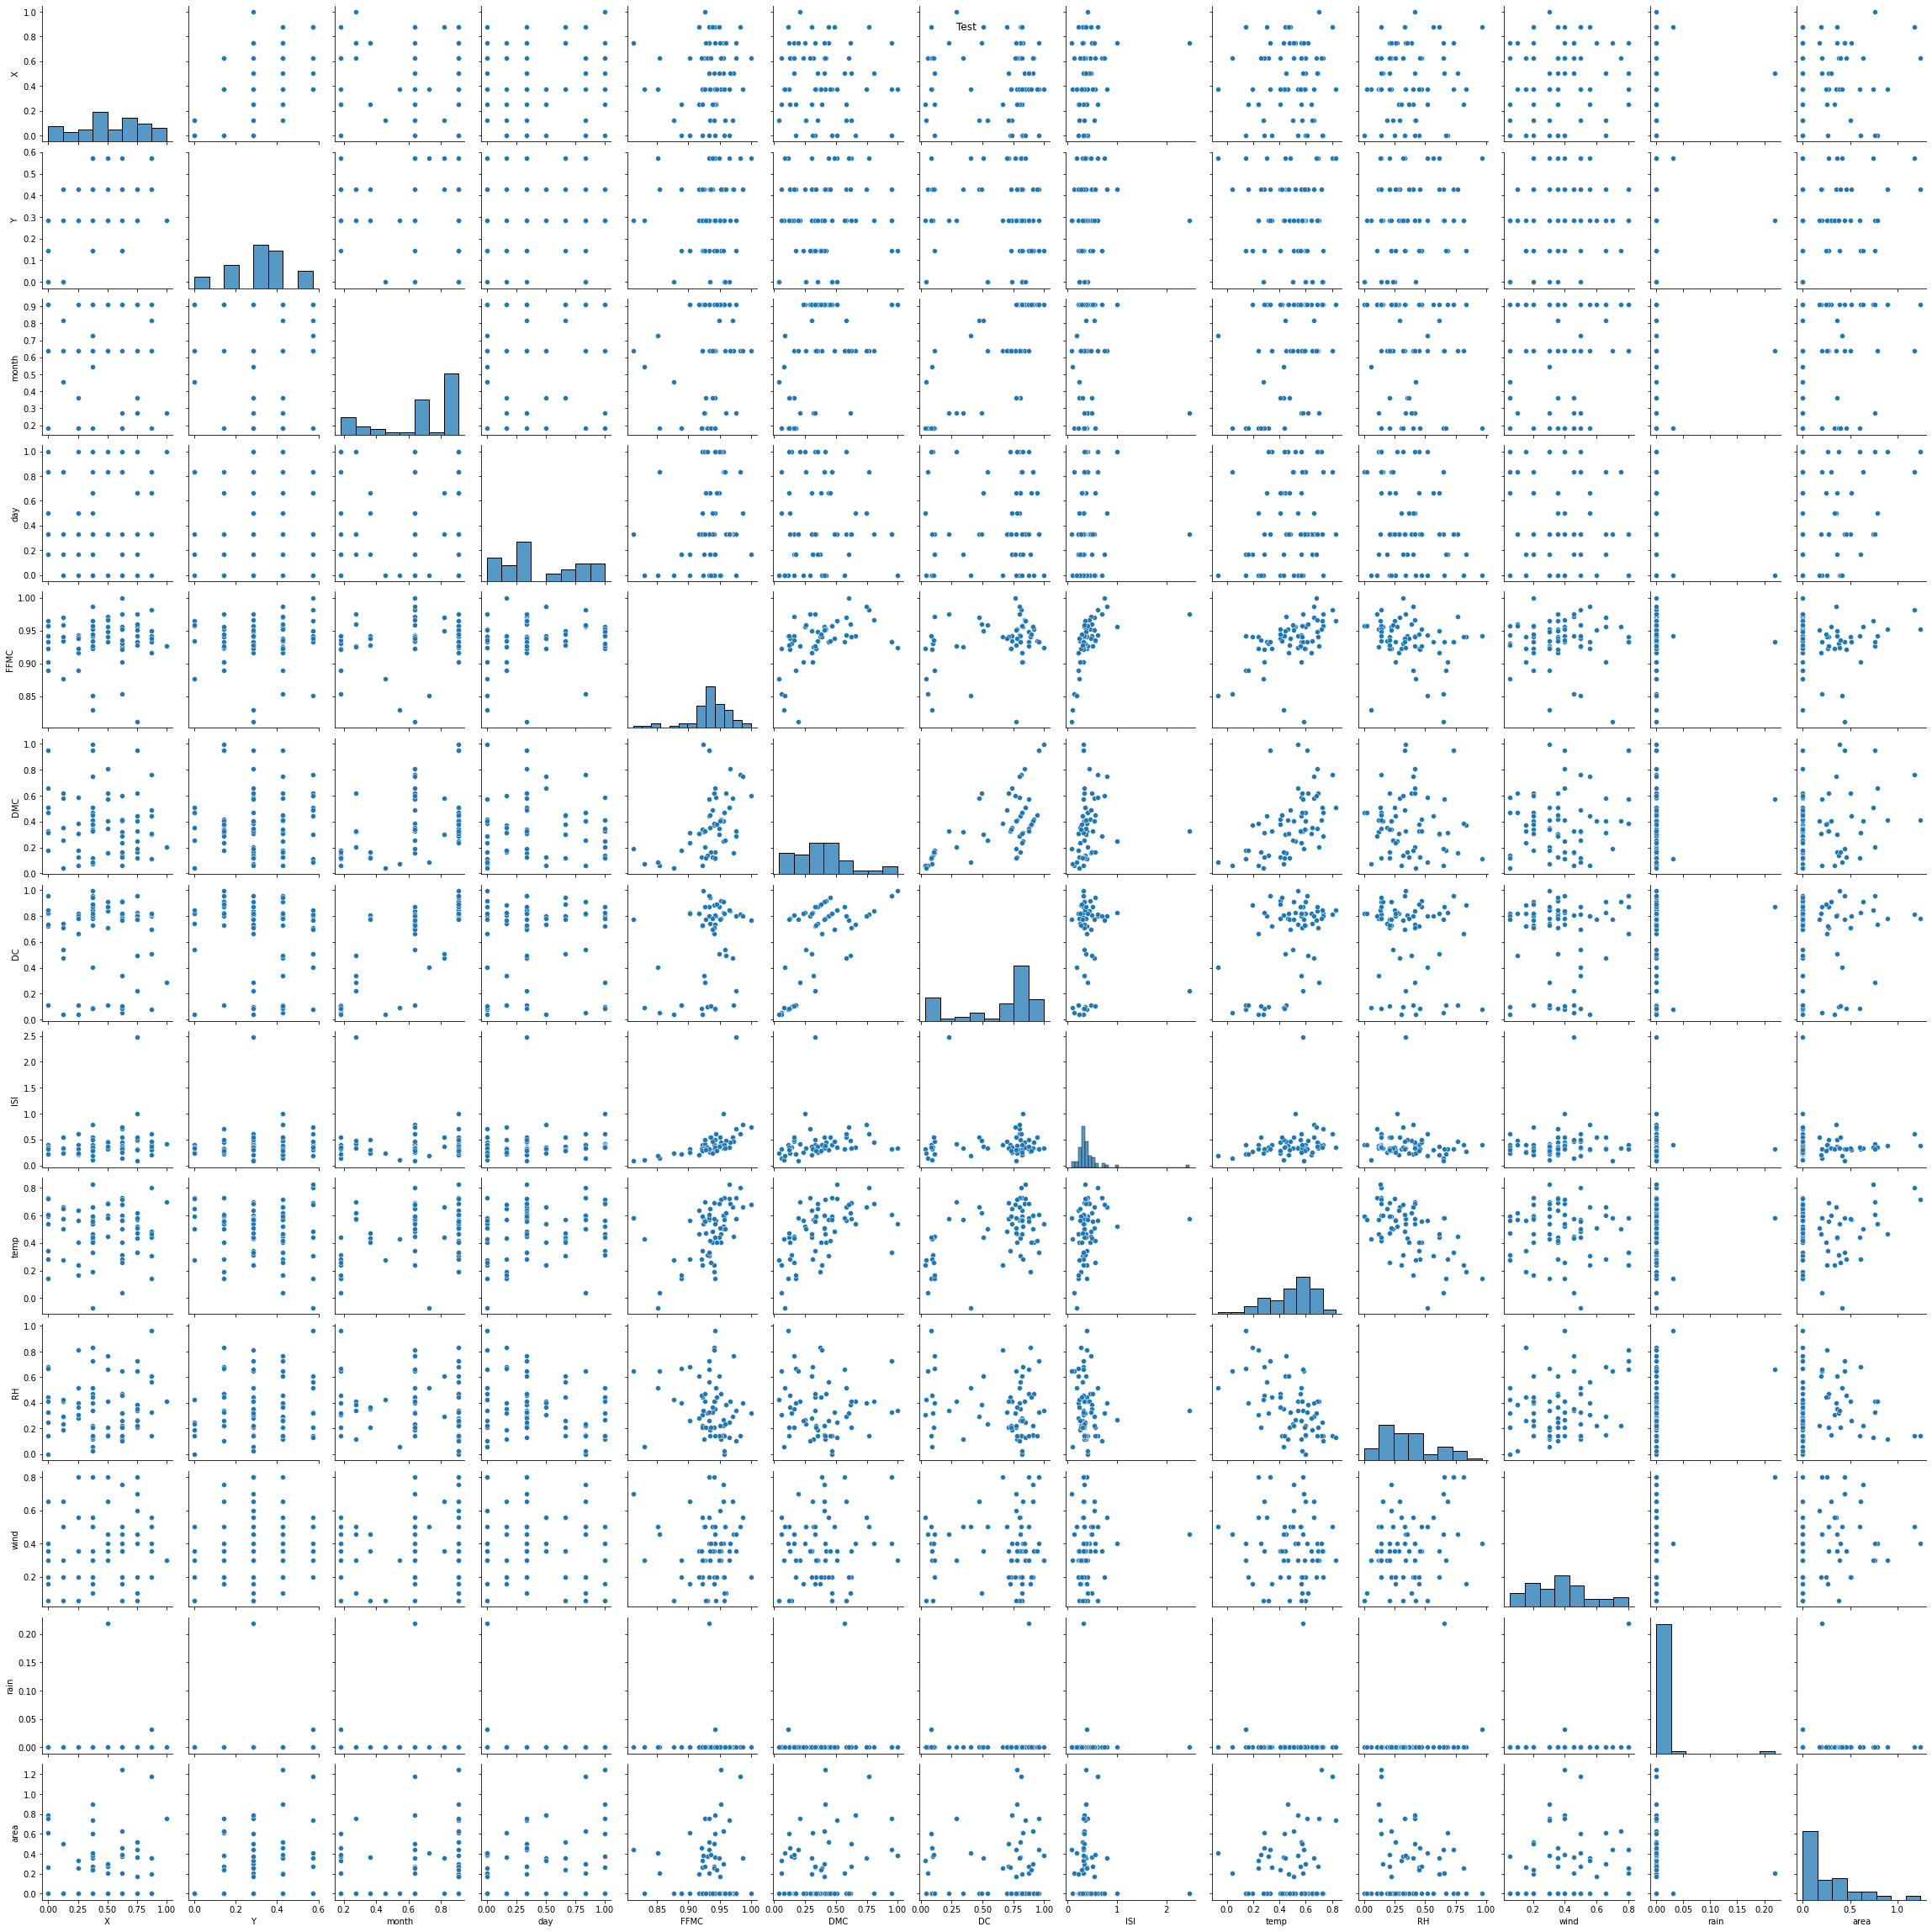

<Figure size 432x288 with 0 Axes>

In [ ]:
pairplot_fields = features.copy()

multiple_fields_plot_template(forest_fire_multiple_plots_df_train, 
                              "Train", 
                              "sns.pairplot")

multiple_fields_plot_template(forest_fire_multiple_plots_df_test, 
                              "Test", 
                              "sns.pairplot")

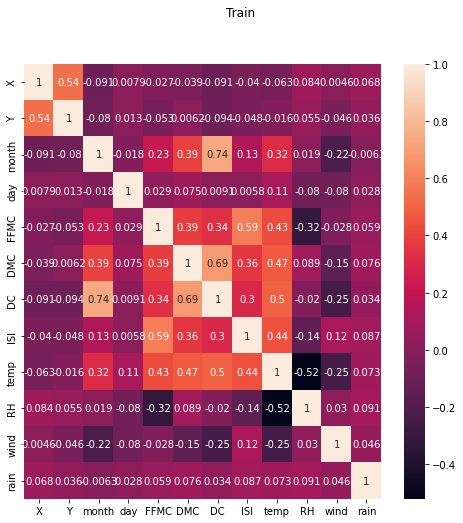

<Figure size 432x288 with 0 Axes>

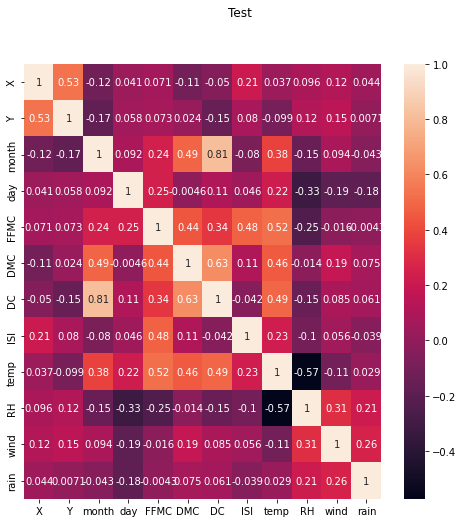

<Figure size 432x288 with 0 Axes>

In [ ]:
heatmap_fields = features.copy()

plt.figure(figsize = (8, 8))
multiple_fields_plot_template(forest_fire_multiple_plots_df_train[heatmap_fields].corr(), 
                              "Train", 
                              "sns.heatmap")

plt.figure(figsize = (8, 8))
multiple_fields_plot_template(forest_fire_multiple_plots_df_test[heatmap_fields].corr(), 
                              "Test", 
                              "sns.heatmap")

## Modelling

Inisialisasi variabel global untuk modelling

In [ ]:
# NUMBER_OF_DATASET_ROWS = x_train_scaled.shape[0]
# X_TRAIN_DF = x_train_scaled.copy()
# X_TEST_DF = x_test_scaled.copy()
NUMBER_OF_DATASET_ROWS = x_train.shape[0]
X_TRAIN_DF = x_train.copy()
X_TEST_DF = x_test.copy()
Y_TRAIN_DF = y_train.copy()
Y_TEST_DF = y_test.copy()

Inisialisasi Model

In [ ]:
def initialize_model_small_layers():
  # Model dengan layer berjumlah sedikit
  number_of_features = len(X_TRAIN_DF.columns)

  model = Sequential()
  model.add(Dense(4, input_dim = number_of_features, activation = "relu"))
  model.add(BatchNormalization())
  model.add(Dense(1, activation = "relu"))

  return model

def initialize_model_medium_layers():
  # Model dengan layer berjumlah sedang
  number_of_features = len(X_TRAIN_DF.columns)

  model = Sequential()
  model.add(Dense(3, input_dim = number_of_features, activation = "relu"))
  model.add(Dense(6, activation = "relu"))
  model.add(BatchNormalization())
  model.add(Dense(6, activation = "relu"))
  model.add(Dense(1, activation = "relu"))

  return model

def initialize_model_large_layers():
  # Model dengan layer berjumlah banyak
  number_of_features = len(X_TRAIN_DF.columns)

  model = Sequential()
  model.add(Dense(6, input_dim = number_of_features, activation = "relu"))
  model.add(Dense(16, activation = "relu"))
  model.add(Dense(32, activation = "relu"))
  model.add(Dense(16, activation = "relu"))
  model.add(BatchNormalization())
  model.add(Dense(8, activation = "relu"))
  model.add(Dense(1, activation = "relu"))

  return model

In [ ]:
def plot_deep_learning_metrics(history, metric, val_metric, title):
  plt.plot(history.history[metric])
  plt.plot(history.history[val_metric])
  plt.title(title)
  plt.ylabel("Value")
  plt.xlabel("Epochs")
  plt.legend([metric, val_metric], loc="upper right")

### Eksperimen ke-1: Komparasi Jumlah Layer dengan karakteristik sebagai berikut.

* **Batch Size**: Disesuaikan dengan jumlah data
* **Epoch Size**: 100
* **Loss Function**: mean_squared_error
* **Learning Rate**: Bawaan dari Optimizers sendiri

In [ ]:
model_layers = ["initialize_model_small_layers", 
                "initialize_model_medium_layers", 
                "initialize_model_large_layers"]

In [ ]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, model_layer in enumerate(model_layers):
  model = eval(model_layer)
  model = model()

  model.compile(
    optimizer = Adam(learning_rate = 0.000001),
    loss = "mean_squared_error",
    metrics = ["accuracy", tf.keras.metrics.RootMeanSquaredError()],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      epochs = 200,
      verbose = 1,
  )
  histories.append(history)

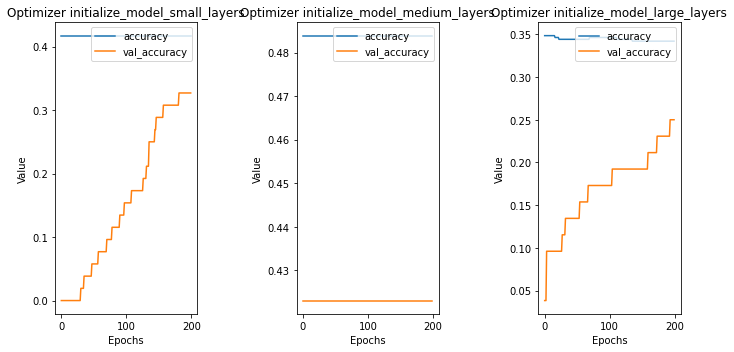

In [ ]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(1, 3, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Optimizer {model_layers[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-2: Komparasi Learning Rate Decay dengan karakteristik sebagai berikut.

* **Epoch Size**: 100
* **Batch Size**: Disesuaikan dengan jumlah data
* **Loss Function**: mean_squared_error
* **Learning Rate**: Bawaan dari Optimizers sendiri
* **Jumlah layer**: sedang

In [ ]:
def decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))

In [ ]:
def make_learning_rates(learning_rate, decay, n_updates = 100):
  learning_rates = []
  for i in range(n_updates):
    learning_rates.append(decay_lrate(learning_rate, decay,i))

  return learning_rates

In [ ]:
global_decays = [1e-1, 1e-2, 1e-3, 1e-4]
local_decays = [1e-2, 3e-2, 5e-2, 9e-2, 1e-1]

n_updates = 100

global_decay_histories = []
local_decay_histories = []

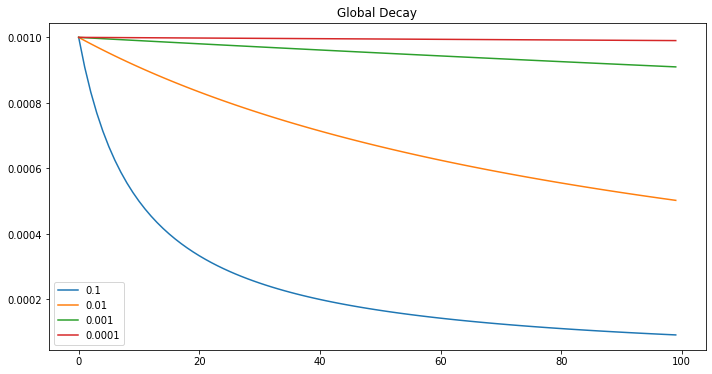

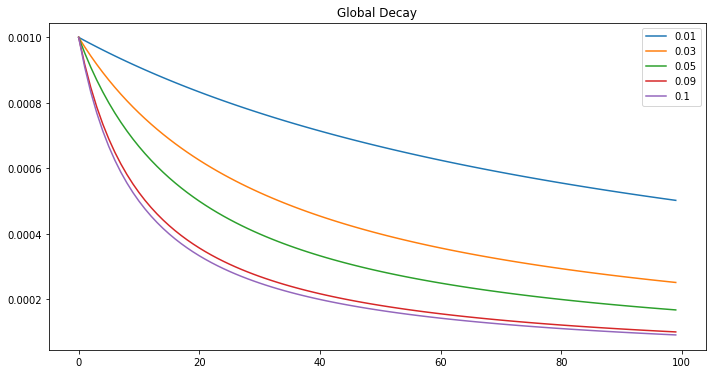

In [ ]:
plt.figure(figsize = (10, 10))
plt.subplot(211)

for decay in global_decays:
  learning_rates = make_learning_rates(0.001, decay)
  
  plt.plot(learning_rates, label=str(decay))
  plt.title('Global Decay')
  plt.tight_layout()
  plt.legend()

plt.figure(figsize = (10, 10))
plt.subplot(212)

for decay in local_decays:
  learning_rates = make_learning_rates(0.001, decay)
    
  plt.plot(learning_rates, label=str(decay))
  plt.title('Global Decay')
  plt.tight_layout()
  plt.legend()

In [ ]:
for index, decay in enumerate(local_decays):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = SGD(learning_rate = 0.0001, decay = decay),
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      epochs = 100,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100
1/1 [==============================] - 1s 688ms/step - loss: 2.6730 - accuracy: 0.3828 - val_loss: 328.7272 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 2.6724 - accuracy: 0.3828 - val_loss: 157.1840 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 2.6719 - accuracy: 0.3828 - val_loss: 100.3671 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 2.6714 - accuracy: 0.3828 - val_loss: 72.3494 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 2.6709 - accuracy: 0.3828 - val_loss: 55.7905 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 2.6704 - accuracy: 0.3828 - val_loss: 44.9187 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 2.6699 - accuracy: 0.3828 - val_loss: 37.2707 - val_ac

### Eksperimen ke-2: Komparasi Optimizers dengan karakteristik sebagai berikut.

* **Batch Size**: Disesuaikan dengan jumlah data
* **Epoch Size**: 100
* **Batch Size**: Disesuaikan dengan jumlah data
* **Loss Function**: mean_squared_error
* **Learning Rate**: Bawaan dari Optimizers sendiri
* **Jumlah layer**: sedang

In [ ]:
optimizers = ["Adam", "RMSprop", "Adamax", SGD(momentum = 0.8), "Adadelta"]

In [ ]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, optimizer in enumerate(optimizers):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = optimizer,
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      epochs = 100,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100
1/1 [==============================] - 1s 890ms/step - loss: 3.6531 - accuracy: 0.3269 - val_loss: 2.7215 - val_accuracy: 0.2692
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 3.6100 - accuracy: 0.3247 - val_loss: 2.6573 - val_accuracy: 0.2115
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 3.5700 - accuracy: 0.3247 - val_loss: 2.6529 - val_accuracy: 0.2308
Epoch 4/100
1/1 [==============================] - 0s 96ms/step - loss: 3.5328 - accuracy: 0.3247 - val_loss: 2.6595 - val_accuracy: 0.2308
Epoch 5/100
1/1 [==============================] - 0s 61ms/step - loss: 3.4985 - accuracy: 0.3247 - val_loss: 2.6695 - val_accuracy: 0.2308
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 3.4659 - accuracy: 0.3247 - val_loss: 2.6758 - val_accuracy: 0.2308
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 3.4355 - accuracy: 0.3269 - val_loss: 2.6816 - val_accuracy: 0.2500
Epoch 8/100
1/1 [==

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  # Remove the CWD from sys.path while we load stuff.


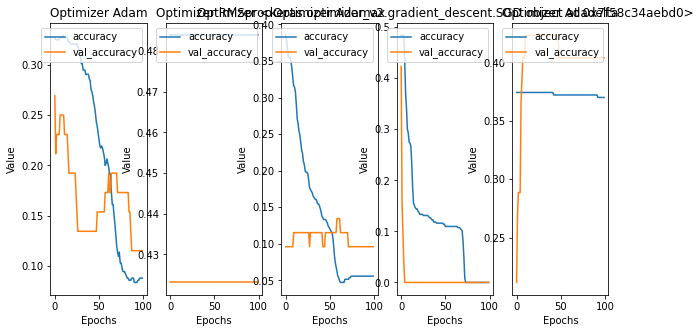

In [ ]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(1, 5, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Optimizer {optimizers[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-3: Komparasi Loss Function dengan karakteristik sebagai berikut.
* **Activation Function**: Disesuaikan dengan Adam
* **Epoch Size**: 100
* **Batch Size**: Disesuaikan dengan jumlah data
* **Learning Rate**: Bawaan dari Optimizers sendiri
* **Jumlah layer**: sedang

In [ ]:
losses = ["mean_squared_error", "mean_absolute_error", "mean_squared_logarithmic_error", "poisson"]

In [ ]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, loss in enumerate(losses):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = "Adam",
    loss = loss,
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      epochs = 100,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100
1/1 [==============================] - 1s 767ms/step - loss: 2.9567 - accuracy: 0.3527 - val_loss: 4.9645 - val_accuracy: 0.0962
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 2.9341 - accuracy: 0.3527 - val_loss: 3.4554 - val_accuracy: 0.1154
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 2.9124 - accuracy: 0.3527 - val_loss: 2.7346 - val_accuracy: 0.1346
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 2.8911 - accuracy: 0.3527 - val_loss: 2.3487 - val_accuracy: 0.1346
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 2.8698 - accuracy: 0.3527 - val_loss: 2.1230 - val_accuracy: 0.1346
Epoch 6/100
1/1 [==============================] - 0s 37ms/step - loss: 2.8486 - accuracy: 0.3527 - val_loss: 1.9826 - val_accuracy: 0.1346
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 2.8281 - accuracy: 0.3527 - val_loss: 1.8909 - val_accuracy: 0.1346
Epoch 8/100
1/1 [==

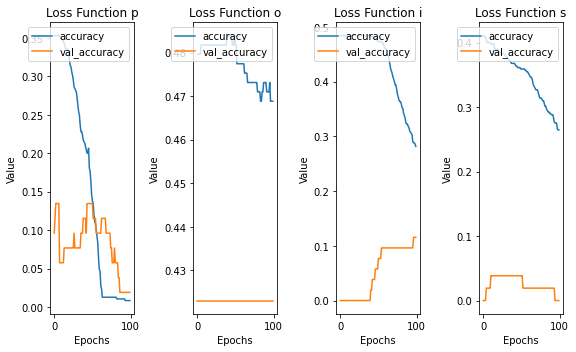

In [ ]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(1, 5, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Loss Function {loss[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-4: Komparasi Batch Size dengan karakteristik sebagai berikut.

* **Activation Function**: mean squared error
* **Optimizers**: Adam
* **Epoch Size**: 200
* **Batch Size**: Disesuaikan dengan jumlah data
* **Loss Function**: mean_squared_error
* **Learning Rate**: Bawaan dari Optimizers sendiri
* **Jumlah layer**: sedang

In [ ]:
batch_sizes = [10, 100, 200, 300, 400, NUMBER_OF_DATASET_ROWS]

In [ ]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, batch_size in enumerate(batch_sizes):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = "Adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = batch_size,
      epochs = 200,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/200
47/47 [==============================] - 1s 6ms/step - loss: 3.0333 - accuracy: 0.4602 - val_loss: 1.8481 - val_accuracy: 0.1154
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 2.7931 - accuracy: 0.4194 - val_loss: 1.9410 - val_accuracy: 0.1346
Epoch 3/200
47/47 [==============================] - 0s 3ms/step - loss: 2.5336 - accuracy: 0.2774 - val_loss: 1.9344 - val_accuracy: 0.0769
Epoch 4/200
47/47 [==============================] - 0s 3ms/step - loss: 2.2922 - accuracy: 0.1398 - val_loss: 1.9220 - val_accuracy: 0.0000e+00
Epoch 5/200
47/47 [==============================] - 0s 3ms/step - loss: 2.1738 - accuracy: 0.0301 - val_loss: 1.8402 - val_accuracy: 0.0000e+00
Epoch 6/200
47/47 [==============================] - 0s 3ms/step - loss: 2.0574 - accuracy: 0.0258 - val_loss: 1.8135 - val_accuracy: 0.0000e+00
Epoch 7/200
47/47 [==============================] - 0s 3ms/step - loss: 2.1069 - accuracy: 0.0043 - val_loss: 1.7765 - val_accuracy: 0.0000e+

Plot History

NameError: ignored

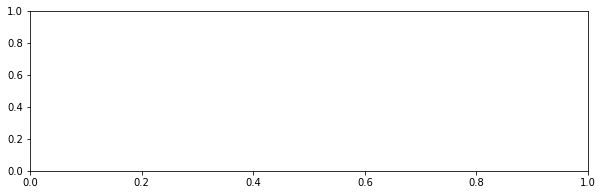

In [ ]:
plt.figure(figsize = (10, 10))

for index, history in enumerate(histories):
  plt.subplot(3, 1, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Avtivation Function {model_layers_names[index]}")

plt.tight_layout()
plt.show()